# Convergence of Fitzhugh-Nagumo model

In [1]:
import solver

# Define Fitzhugh-Nagumo model
def fitzhugh_nagumo(x, y):
    alpha = 0.1
    gamma = 0.5
    epsilon = 0.01
    eq1 = (y[0] * (1 - y[0]) * (y[0] - alpha) - y[1] + 0.026) / epsilon
    eq2 = y[0] - gamma * y[1]

    return [eq1, eq2]

# Define initialisation value for numerical method
x_min = 0
x_max = 1
initial_value = [0.01, 0.01]

In [2]:
# Create reference solution
ref_stepsize = 1e-7
mesh_pt = (x_max - x_min) / ref_stepsize

problem = solver.OneStepMethods(
    fitzhugh_nagumo, x_min, x_max, initial_value, mesh_pt)

# Solve with Euler's explicit method
ref_mesh, ref_soln = problem.Euler_explicit()

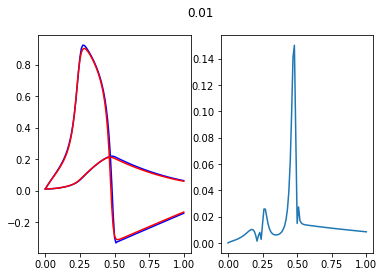

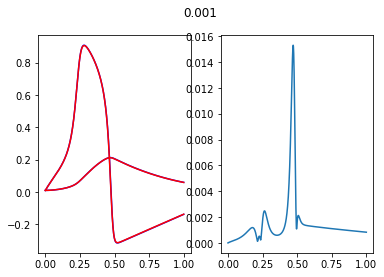

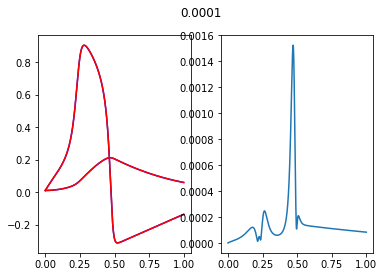

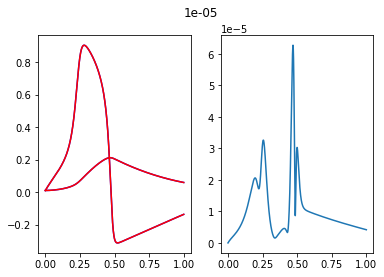

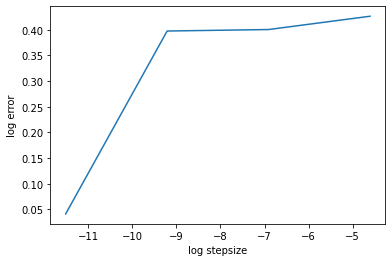

In [3]:
stepsize_range = [1e-2, 1e-3, 1e-4, 1e-5]
meshpt_range = [(x_max - x_min) / step for step in stepsize_range]
mesh_list = []
soln_list = []
for mesh_points in meshpt_range:
    problem = solver.OneStepMethods(
        fitzhugh_nagumo, x_min, x_max, initial_value, mesh_points)

    # Solve with Euler's explicit method
    mesh, soln = problem.Euler_explicit()
    mesh_list.append(mesh)
    soln_list.append(soln)

import numpy as np

exact_soln_list = []
error_list = []
count = 0
for (mesh,soln) in zip(mesh_list,soln_list):
    mesh_point_diff = stepsize_range[count] / ref_stepsize
    exact_soln = []
    error = []
    for i in range(len(mesh)):
        ref_value = ref_soln[int(i * mesh_point_diff)]
        exact_soln.append(ref_value)
        
        err_value = np.linalg.norm(np.array(ref_value) - np.array(soln[i]))
        error.append(err_value)
        
    exact_soln_list.append(exact_soln)
    error_list.append(error)
    count += 1
    
    
import matplotlib.pyplot as plt

for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b')
    ax1.plot(mesh_list[i], exact_soln_list[i], 'r')
#     ax1.plot(ref_mesh, ref_soln, 'r')
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()

sum_error_stepsize = []
for i in range(len(stepsize_range)):
    sum_error_stepsize.append(np.sum(np.array(error_list[i])))

plt.figure()
plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(sum_error_stepsize)))
plt.ylabel('log error')
plt.xlabel('log stepsize')
plt.show()

# Adaptive method

In [4]:
# Create reference solution
ref_tolerance = 1e-8

problem = solver.AdaptiveMethod(
    fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

# Solve with Euler's explicit method
ref_mesh, ref_soln = problem.ode23(abs_tol=ref_tolerance, rel_tol=1e-15)

In [5]:
tolerance_range = [1e-2, 1e-3, 1e-4, 1e-5]
mesh_list = []
soln_list = []
for tolerance in tolerance_range:
    problem = solver.AdaptiveMethod(
        fitzhugh_nagumo, x_min, x_max, initial_value, initial_mesh=0.1)

    # Solve with adaptive ode23 method
    mesh, soln = problem.ode45(abs_tol=tolerance, rel_tol=1e-15)
    mesh_list.append(mesh)
    soln_list.append(soln)

# exact_soln_list = []
# error_list = []
# count = 0
# for (mesh,soln) in zip(mesh_list,soln_list):
#     mesh_point_diff = stepsize_range[count] / ref_stepsize
#     exact_soln = []
#     error = []
#     for i in range(len(mesh)):
#         ref_value = ref_soln[int(i * mesh_point_diff)]
#         exact_soln.append(ref_value)
        
#         err_value = np.linalg.norm(np.array(ref_value) - np.array(soln[i]))
#         error.append(err_value)
        
#     exact_soln_list.append(exact_soln)
#     error_list.append(error)
#     count += 1
    

for i in range(len(mesh_list)):
    fig, (ax1, ax2) = plt.subplots(1, 2)
    fig.suptitle(str(stepsize_range[i]))
    ax1.plot(mesh_list[i], soln_list[i], 'b')
    ax1.plot(ref_mesh, ref_soln, 'r')
    ax2.plot(mesh_list[i], error_list[i])
    plt.show()

# sum_error_stepsize = []
# for i in range(len(stepsize_range)):
#     sum_error_stepsize.append(np.sum(np.array(error_list[i])))

# plt.figure()
# plt.plot(np.log(np.array(stepsize_range)), np.log(np.array(sum_error_stepsize)))
# plt.ylabel('log error')
# plt.xlabel('log stepsize')
# plt.show()

KeyboardInterrupt: 